# Fake Review Generation on the Yelp Dataset

More information on the Yelp dataset: https://www.yelp.com/dataset

In [1]:
!python3 -V

Python 3.7.15


In [2]:
!pip3 install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install transformers
!pip install fastai==2.2.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1 MB 1.3 MB/s eta 0:04:02tcmalloc: large alloc 1147494400 bytes == 0x3a51e000 @  0x7f72037d3615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |█████████████████████████████▏  | 1055.7 MB 1.3 MB/s eta 0:01:20tcmalloc: large alloc 1434370048 bytes == 0x7eb74000 @  0x7f72037d3615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |█████

In [3]:
import gc
import torch
from transformers import GPT2LMHeadModel, GPT2TokenizerFast
from fastai.text.all import *

In [4]:
print(torch. __version__)

1.7.1+cu110


In [5]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
#!tar -xvf /content/drive/MyDrive/YelpDataset/yelp_dataset.tar

In [6]:
!ls /content/drive/MyDrive/YelpDataset/dataframes

restaurantDF.pkl


In [7]:
#%cp /content/yelp_academic_dataset_review.json /content/drive/MyDrive/YelpDataset

In [8]:
#%cp /content/drive/MyDrive/YelpDataset/yelp_academic_dataset_review.json /content/
%cp /content/drive/MyDrive/YelpDataset/dataframes/restaurantDF.pkl /content/

In [9]:
import pandas as pd

In [10]:
df = pd.read_pickle('restaurantDF.pkl')

In [13]:
df.shape

(3773770, 15)

In [14]:
#process the yelp dataset in similar fashion to the amazon review dataset.
#we'll only need the text coloumn in our case
df_main = df[['text']]

In [15]:
df_main = df_main.rename(columns={'text': 'reviewText'})

In [16]:
df_main.head()

,reviewText
0,"This is nice little Chinese bakery in the heart of Philadelphia's Chinatown! The female cashier was very friendly (flirtatious!) and the pastries shown in nicely adorned display cases. I stopped by early one evening had a sesame ball, which was filled with bean paste. The glutinous rice of the ball was nicely flavored, similar to Bai Tang Gao. Definitely as place worth stopping at if you are in the area."
1,"This is the bakery I usually go to in Chinatown. They have a decent variety of buns and pastries. Red bean-filled buns, mung bean-filled buns, coconut stuff, egg tarts etc. If you buy a dozen, they will give you two more for free. The prices are standard for a Chinese bakery, with most things at approximately $1. The service has always been good. They do serve coffee and tea. There are a couple of tables inside, with usually the expected group of older Chinese guys chillin' in the corner table debating about something. Great place to stock up on the buns, which I usually do before ..."
2,"A delightful find in Chinatown! Very clean, and very kind service. Everyone always seems happy in here, and their treats are absolutely delicious. You can also get a ton of sweet treats without any judgement! They're my favorite."
3,I ordered a graduation cake for my niece and it came out absolutely perfect. Will come again for future events! Staff was nice also and the cake was really good.
4,"HK-STYLE MILK TEA: FOUR STARS\n\nNot quite sure why there are two Saint Honore Pastries business listings on Yelp, but I have been checking in to this one.\n\nBoyfriend and I go by it all the time while in Chinatown, but it never crossed our mind to try it. I think we might have tried it once a year or two ago, but it wasn't memorable. I decided to try the HK-style milk tea not too long ago and was hooked. I think I went here almost every day one week to get the milk tea, only to realize that I should REALLY watch my sugar intake...it's sooo good! \n\nI personally don't think it's bet..."


In [17]:
df_main.shape

(3773770, 1)

In [18]:
#sample_size = len(df_main)

In [19]:
sample_df = df_main.sample(frac=0.05, random_state=2021).dropna().reset_index()

In [20]:
sample_df.dtypes

index          int64
reviewText    object
dtype: object

In [21]:
del df_main
gc.collect()

167

In [22]:
sample_df.shape

(188688, 2)

In [23]:
#Let's import the pretrained GPT2 model and the tokenizers
pretrained_weights = 'gpt2'
tokenizer = GPT2TokenizerFast.from_pretrained(pretrained_weights)
model = GPT2LMHeadModel.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

In [24]:
device = torch.device("cuda")

In [25]:
model.to(device)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dro

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
df_train, df_valid = train_test_split(sample_df, random_state=2021, test_size=0.1)

In [28]:
all_texts = np.concatenate([df_train["reviewText"].values, df_valid["reviewText"].values])

In [29]:
all_texts.shape

(188688,)

In [30]:
e = 0
toRemove = []
for i in range(len(all_texts)):
  if all_texts[i]=="":
    e+=1
    print(f"all_texts[{i}] is empty")
    all_texts[i] = 'a'
    toRemove.append(i)

print(f"Number of rows that are empty={e}. To remove indecies={toRemove}")

Number of rows that are empty=0. To remove indecies=[]


In [31]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [32]:
splits = [list(df_train.index), list(df_valid.index)]
tls = TfmdLists(all_texts, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)

In [ ]:
e = 0
for i in range(len(tls.train)):
  if tls.train[i].type() != 'torch.LongTensor':
    #print(f'tls.train[{i}] not a long tensor')
    #print(f'tls.train[{i}] is a {tls.train[i].type()}')
    e+=1
print("Total of e=",e," empty")

In [34]:
tls.tfms(tls.train.items[0]).shape, tls.tfms(tls.valid.items[0]).shape

(torch.Size([153]), torch.Size([130]))

In [35]:
show_at(tls.train, 0)

The pizza is awesome and are definitely worth the trip and the price.  the trio fries are also awesome. 

I always enjoy their beers and have spent way too much money there drinking them.  the rye ipa is a solid beer.  

the only downsides are that prices can add up quick if you have a few beers and pizza.  Their happy hour is from 4-6 so its hard to actually be there for it considering the location, and I'm pretty sure its a 1 or 2 off of one particular beer, not everything.  The place also doesnt have a tv, which might make alot of hipsters happy, but it would be nice to be able to watch a phils game or something while there.


In [36]:
show_at(tls.valid, 0)

I tried this donut shop about a month ago when I was in town and, I have to say, it was delicious! One thing that really stood out to me was that every donut in the store was presented beautifully - from edible flowers to sweet baked apple sprinkled on top. I had the POG (passion orange guava) donut and biting into it instantly took me back to tropical Hawaiian vacations of years past. Although it costs a bit more than your average donut place, the unique and surprising flavors along with excellent quality make it worth it. If you're in the area, Hook and Press is definitely worth a visit.


In [37]:
bs,sl = 4,200
dls = tls.dataloaders(bs=bs, seq_len=sl, device=device)

In [38]:
dls.show_batch(max_n=2)

,text,text_
0,"Chicken parmesan sandwich was on point 10/10 would recommend friendly staff and love the location designThey were so efficient here! We went and it was crowded but they moved so quickly and we had to barely wait for our blizzards. I got the summer berry cheesecake one and it was good it tasted fresh but it wasn't as the cotton candy. My boyfriend got the Oreo and it was very good! I was very impressed with the work ethic of the employees.we came off the freeway looking for a place to get ice cream and we found this place. it has a selection of most the classic flavors, and a huge selection of toppings. the guy working was super friendly and offered gloves so we didn't have to touch the machines or the topping spoons. when we went to check out he let us try to guess the price to","parmesan sandwich was on point 10/10 would recommend friendly staff and love the location designThey were so efficient here! We went and it was crowded but they moved so quickly and we had to barely wait for our blizzards. I got the summer berry cheesecake one and it was good it tasted fresh but it wasn't as the cotton candy. My boyfriend got the Oreo and it was very good! I was very impressed with the work ethic of the employees.we came off the freeway looking for a place to get ice cream and we found this place. it has a selection of most the classic flavors, and a huge selection of toppings. the guy working was super friendly and offered gloves so we didn't have to touch the machines or the topping spoons. when we went to check out he let us try to guess the price to"
1,"seatings, the bread was served fresh and yummy, gumbo was good too. Only thing I have complaint is the service, we sat down for a long time before the server came to get our drinks. It was a bit crowded and I can see she had a big table, but she could have stopped by and let us know she'll be with us soon.\n\nBut yeah, whats not to love about Cajun food? NOM NOM!I love, love, love this place. Did I happen to say LOVE this place! I was in town for business and we decided to go to Sup for lunch. My visit was for 2 weeks and I visited Sup maybe 4-5 times during those 2 weeks. I enjoyed every sandwich and soup combo. The extra bonus was a little cookie and salad that accompany every sandwich. The Tuna Melt was absolutely","ings, the bread was served fresh and yummy, gumbo was good too. Only thing I have complaint is the service, we sat down for a long time before the server came to get our drinks. It was a bit crowded and I can see she had a big table, but she could have stopped by and let us know she'll be with us soon.\n\nBut yeah, whats not to love about Cajun food? NOM NOM!I love, love, love this place. Did I happen to say LOVE this place! I was in town for business and we decided to go to Sup for lunch. My visit was for 2 weeks and I visited Sup maybe 4-5 times during those 2 weeks. I enjoyed every sandwich and soup combo. The extra bonus was a little cookie and salad that accompany every sandwich. The Tuna Melt was absolutely divine,"


### Fine Tuning 

In [39]:
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]

In [40]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()

In [41]:
learn.validate()

(#2) [3.7687299251556396,43.32500457763672]

SuggestedLRs(lr_min=0.017378008365631102, lr_steep=0.14454397559165955)

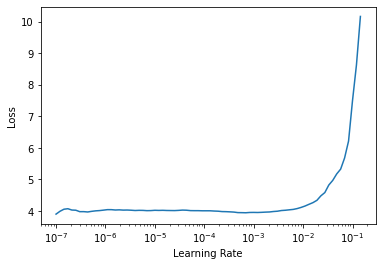

In [42]:
learn.lr_find()

In [43]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,perplexity,time
0,3.306005,3.255290,25.927120,1:20:41


A perplexity of 100 means that whenever the model is predicting the next word, the model is as confused as if it had to pick between 100 different words

In [44]:
#save model weights. Commented out since we don't need it now
learn.save("gpt2-finetuned-yelp-reviews-sample-1cycle-Restaurants")

Path('models/gpt2-finetuned-yelp-reviews-sample-1cycle-Restaurants.pth')

In [47]:
%cp -r /content/models/ /content/drive/MyDrive/YelpDataset/

In [48]:
df_valid.head(1)

,index,reviewText
185900,6844310,"Been here many times. Wait staff mostly pretty good and food is good and reasonably priced. My gripe is in the lobby. Never fails, they don't greet you, just let you stand there until they get around to you. Gal at cashier sits eating. \nWhy not, Welcome to La Teresita, i'll be right with you? They just don't make you feel welcome. Really, basic customer service, not sure why this group has no clue ?????"


### Review Example 1

In [53]:
prompt = "Not satisfied with the food"

In [54]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 5])

In [55]:
preds = learn.model.generate(inp, max_length=40, num_beams=5, temperature=0.75, early_stopping=True, no_repeat_ngram_size=2)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [56]:
tokenizer.decode(preds[0].cpu().numpy())

'Not satisfied with the food at all. \n\nThe service was terrible. We waited for over an hour and a half for our food to come out. When we finally got it, it was'

### Review Example 2



In [57]:
prompt = "Not satisfied with the food"

In [58]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 5])

In [59]:
preds = learn.model.generate(inp, max_length=60, num_beams=5, temperature=0.75, early_stopping=True, no_repeat_ngram_size=2)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [60]:
tokenizer.decode(preds[0].cpu().numpy())

'Not satisfied with the food at all. \n\nThe service was terrible. We waited for over an hour and a half for our food to come out. The food was cold and tasted like it had been sitting under a heat lamp for a long time. My husband ordered a burger and fries and'

### Review Example 3



In [69]:
prompt = "Looked good in pictures, but the food was bad"

In [70]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 11])

In [71]:
preds = learn.model.generate(inp, max_length=60, num_beams=5, temperature=0.75, early_stopping=True, no_repeat_ngram_size=2)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [72]:
tokenizer.decode(preds[0].cpu().numpy())

'Looked good in pictures, but the food was bad. \n\nI ordered the shrimp and grits. The shrimp were overcooked and had a weird taste to it. It tasted like it had been sitting under a heat lamp for a while. I asked the waitress if it was okay and'

### Review Example 4



In [111]:
prompt = "The ramen was okay"

In [112]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 5])

In [125]:
preds = learn.model.generate(inp, max_length=500, num_beams=10, temperature=0.75, early_stopping=True, no_repeat_ngram_size=5)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [126]:
tokenizer.decode(preds[0].cpu().numpy())

"The ramen was okay. The broth was a little too salty for my taste, but it was still good. \n\nOverall, I would recommend this place if you're in the area and looking for a good ramen place.I've been here a few times and have never had a bad experience. The service is always great and the food is always delicious. I've never had a bad meal here. The only thing I would change is that I would like to see a little more variety in the menu. I've tried a few different things on the menu and I've never been disappointed. I would definitely recommend this place to anyone looking for a great ramen place in the area.I love this place. The food is great and the service is great. I've been here a couple of times and have never been disappointed. The food is always fresh and the prices are very reasonable. The only reason I'm giving it 4 stars instead of 5 is because the service is a little slow, but the food is always good and the prices are reasonable. If you're looking for a place to grab a qui